In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import re

In [8]:
relations = ['Cause-Effect', 'Component-Whole', 'Entity-Destination', 'Product-Producer', 'Entity-Origin',
             'Member-Collection', 'Message-Topic', 'Content-Container', 'Instrument-Agency', 'Other']

dataset_dir = os.path.join("..", "dataset", "")
train_path = os.path.join(dataset_dir, "test.txt")
max_words = 20000

texts = list()
labels = list()
pairs = list()
with open(train_path) as fp:
    while True:
        line = fp.readline()
#         label = fp.readline()
#         if not line or not label:
#             break
        if not line:
            break
        texts.append(line.split(" ", 1)[1])
#         tmp = label.split('(')
#         labels.append(tmp[0])
#         pairs.append(re.split(r',|\)',tmp[1])[:-1])


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sentences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
index_word = tokenizer.index_word

maxlen = max(map(len, sentences))

# X = tf.keras.preprocessing.sequence.pad_sequences(sentences, maxlen=maxlen)
# Y = list(map(relations.index, labels))
# Y = np.eye(len(relations))[Y]

0.980625

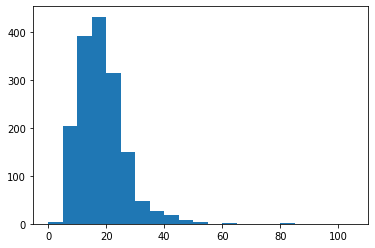

In [12]:
lens = np.asarray(list(map(len, sentences)))
plt.hist(lens, bins =  np.arange(0,110,5)) 
(lens < 40).sum()/1600

1055

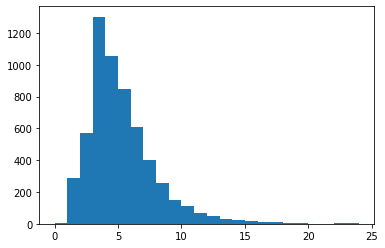

In [91]:
num_mul_word_entity = 0
distances = list()
for i in range(0,6400):
    try:
        pair = pairs[i]
        sentence = sentences[i]
        w1, w2 = word_index[pair[0].lower()], word_index[pair[1].lower()]  
        l1 = sentence.index(w1)
        l2 = sentence.index(w2)
        dis = abs(l1-l2)
        distances.append(dis)
    except ValueError as e:
        print(i, sentence, pair)
    except KeyError as e:
        num_mul_word_entity += 1
distances = np.asarray(distances)
plt.hist(distances, bins =  np.arange(0,25,1)) 
(distances == 4).sum()

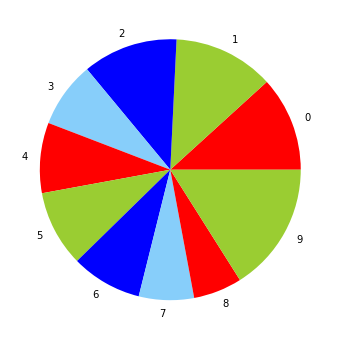

In [25]:
labels = list(range(0,10))
cnt_Y = Counter(Y)
values = [cnt_Y[i] for i in range(0,10)]


plt.figure(figsize=(6,6))

colors = ['red','yellowgreen','blue','lightskyblue']
plt.pie(values,labels=labels,colors=colors)
plt.show()

+ $P(sentence\_len < 40) = 99.23%$
因此将长度设为40
+ 存在544个多单词实体，如platinum crucible
+ 存在关系的实体距离集中在1-8